## Байесовская линейная регрессия с библиотекой PYMC3 

В этой практике рассмотрим PYMC3 для байесовской линейной регрессии с оценкой апостериорных распределений вероятностей. 

In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Давайте создадим некоторые переменные для нашей регрессии. Наши истинные значния:
* $\alpha = 1$
* $\sigma = 1$
* $\beta = 2.5$

Наша итоговая переменная будет расчитана по:
$$ Y = \alpha + \beta_1 X + N(0,\sigma).$$

In [2]:
# фиксируем сид
np.random.seed(42)

# Задаем значения параметров
alpha, sigma = 1, 1
beta = [2.5]

# Размер датасета
size = 1000

# Генерируем вектора признаков
X = np.random.randn(size)

# Считаем
Y = alpha + beta * X + np.random.randn(size)*sigma

отрисовка

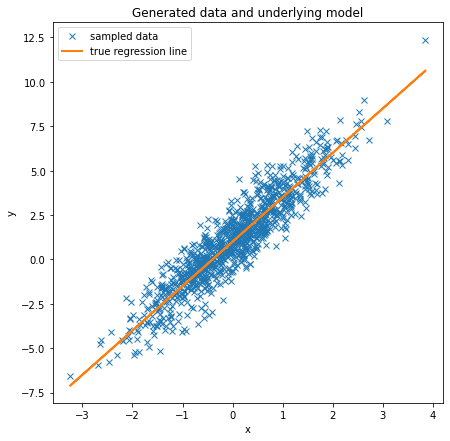

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(X, Y, "x", label="sampled data")
ax.plot(X, alpha + beta * X, label="true regression line", lw=2.0)
plt.legend(loc=0);

Теперь построим модель.

Априорные распределения:
* $\alpha \sim \mathcal{N}(\mu=0,\sigma=10)$
* $\beta[i] \sim \mathcal{N}(\mu=0,\sigma=10)$, where $i=1$
* $\sigma \sim \textrm{half-normal}(\sigma=1)$

Определим ожидаемое значение:
\begin{equation}
  \text{Y} = \alpha + \beta*X
\end{equation}

Байесовцы придерживаются вероятностного взгляда на мир и выражают эту модель в терминах вероятностных распределений. Нашу приведенную выше линейную регрессию можно переписать, чтобы получить:

\begin{equation}
  \text{Y}\sim \mathcal{N}(\mu=\mu,\sigma=\sigma).
\end{equation}

In [4]:
basic_model = pm.Model()

with basic_model:

    # Приоры для неизвестных параметров модели 
    alpha = pm.Normal('alpha', mu=0, sigma=100) #intercept
    beta = pm.Normal('beta', mu=0, sigma=100) #slope
    sigma = pm.HalfNormal('sigma', sigma=100)

    # Ожидаемое значение переменной
    mu = alpha + beta * X

    # Вероятность (выборочное распределение) наблюдений / Likelihood (sampling distribution) of observations
    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=Y)

    # Получаем 5000 объектов из апостериорного распределения
    linear_trace = pm.sample(5000)

c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid v

Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 3235 seconds.


In [5]:
basic_model

<ipython-input-119-d4aca2f3bfb2>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(linear_trace, figsize = (12, 12))
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/y.mochalova/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

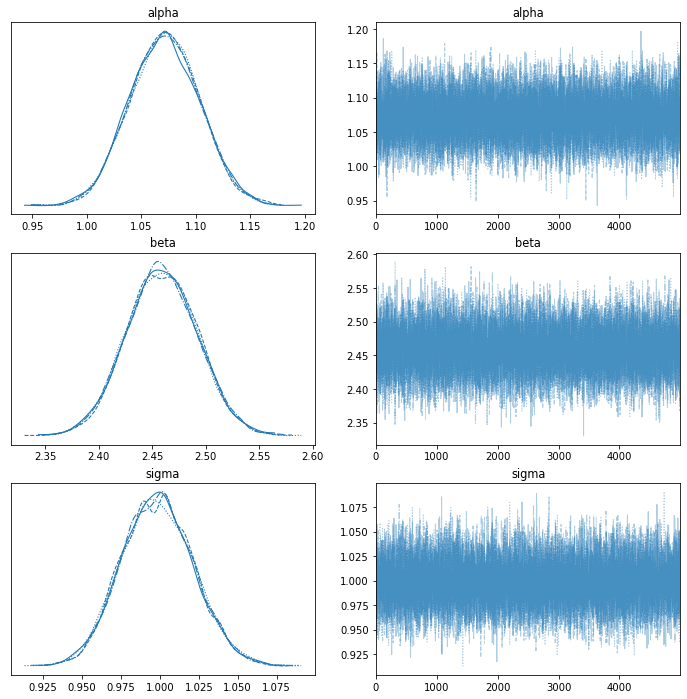

In [119]:
pm.traceplot(linear_trace, figsize = (12, 12))

traceplot - это стандартный хороший способ просмотра апостериорных распределений вероятностей

Got error No model on context stack. trying to find log_likelihood in translation.
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


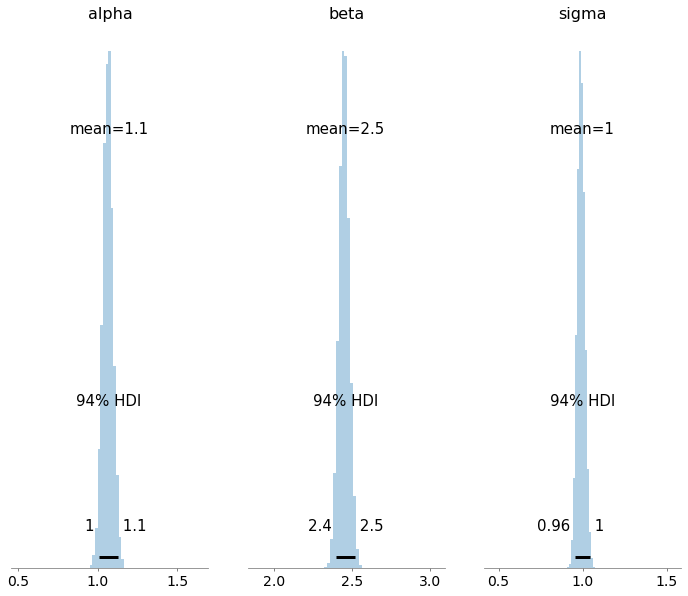

In [6]:
pm.plot_posterior(linear_trace, figsize = (12, 10), kind="hist");

Также есть встроенная функция сводки.

In [7]:
pm.summary(linear_trace).round(2)

Got error No model on context stack. trying to find log_likelihood in translation.
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.07,0.03,1.01,1.13,0.0,0.0,13870.0,7273.0,1.0
beta,2.46,0.03,2.40,2.52,0.0,0.0,14392.0,7658.0,1.0
sigma,1.00,0.02,0.96,1.04,0.0,0.0,14109.0,7443.0,1.0


c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\pymc3\plots\posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


TypeError: object of type 'TensorVariable' has no len()

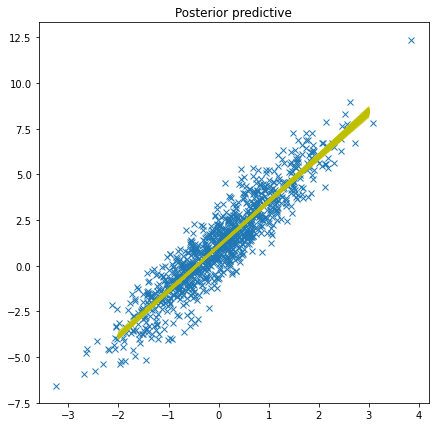

In [8]:
plt.figure(figsize=(7, 7))
plt.plot(X, Y, "x", label="sampled data")
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(-2, 3, 50), linewidth = 1, 
                                 color = 'y', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['alpha'] + sample['beta'] * x);

plt.plot(X, alpha + beta * X, label="true regression line", lw=2.0)
plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y");

In [9]:
alpha = linear_trace['alpha'].mean() 
beta = linear_trace['beta'].mean()

Задание модуля:

In [12]:
# фиксируем сид
np.random.seed(42)

# Задаем значения параметров
alpha, sigma = 1, 1
beta = [2.5]

# Размер датасета
size = 1000

# Генерируем вектора признаков
X = np.random.randn(size)

# Считаем
Y = [1 if x > 1 else 0 for x in alpha + beta * X + np.random.randn(size)*sigma]

In [14]:
new_model = pm.Model()

with new_model:

    # Приоры для неизвестных параметров модели 
    alpha = pm.Normal('alpha', mu=0, sigma=100) #intercept
    beta = pm.Normal('beta', mu=0, sigma=100) #slope
    sigma = pm.HalfNormal('sigma', sigma=100)

    # Ожидаемое значение переменной
    p = pm.math.sigmoid(alpha + beta * X + sigma)

    # Вероятность (выборочное распределение) наблюдений / Likelihood (sampling distribution) of observations
    likelihood = pm.Bernoulli('likelihood', p, observed=Y)

    # Получаем 5000 объектов из апостериорного распределения
    linear_trace = pm.sample(5000)

c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divid

Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 7249 seconds.
There were 469 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6441536311485646, but should be close to 0.8. Try to increase the number of tuning steps.
There were 253 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\pymc3\plots\posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


TypeError: object of type 'TensorVariable' has no len()

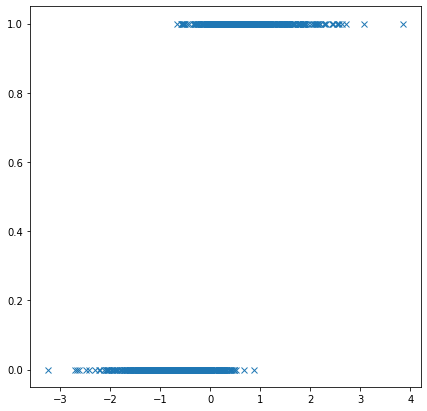

In [15]:
plt.figure(figsize=(7, 7))
plt.plot(X, Y, "x", label="sampled data")
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(-2, 3, 50), linewidth = 1, 
                                 color = 'y', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: pm.math.sigmoid(sample['alpha'] + sample['beta'] * x));

plt.plot(X, alpha + beta * X, label="true regression line", lw=2.0)
plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y");

In [16]:
alpha = linear_trace['alpha'].mean() 
beta = linear_trace['beta'].mean()